In [1]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction

The Goal: To find which neighborhood in Pittsburgh is the most on-fire. Theoretically, whichever neighborhood that has the most fire incidents is also the neighborhood which uses the most water - to put the fires out. 

In [3]:
fires = pd.read_csv("fire_alert.csv", sep= ",")
fireDF = fires.loc[:, ["incident_type", "type_description", "neighborhood"]]
##Grab the csv file for the dataframe, only including necessary information

fireDF = fireDF.dropna()
fireDF
##There is the printed value without any NaN values - simply removing them instead of applying them

,incident_type,type_description,neighborhood
3,131.0,Passenger vehicle fire,Fineview
4,111.0,Building fire,Fairywood
5,150.0,"Outside rubbish fire, Other",South Side Flats
6,113.0,"Cooking fire, confined to container",Allegheny Center
7,111.0,Building fire,Lincoln-Lemington-Belmar
...,...,...,...
8953,111.0,Building fire,Beechview
8954,113.0,"Cooking fire, confined to container",Middle Hill
8955,111.0,Building fire,Garfield
8956,151.0,"Outside rubbish, trash or waste fire",Hazelwood


Different kinds of fires have different incident values, which correlate to how intense a given fire is. Generally, higher incident values indicate less intense fires, such as an outside trash fire having a value of 150, compared to a building fire having a value of 111. Theoretically, the higher a neighborhood's incident value, the less intense fires it would statistically have. 

So, by counting which neighborhoods have higher total values for how many incidents they have, compared to lower incident values, we can find what would theoretically be the 'most on-fire' neighborhood, and the neighborhood that would use the most water to put out fires.

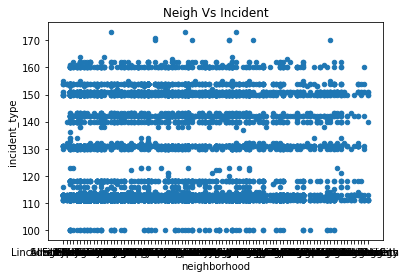

In [4]:
##Scatterplot used to analyze generally which neighborhoods have which kinds of fires
fireDF.plot(kind='scatter', x='neighborhood', y='incident_type', title='Neigh Vs Incident')

The scatterplot is not exactly readable, at all. Moreover, it doesn't actually list values which appear more than once - only giving a summary of which neighborhoods (or which. balls of illegible black text) have which values at least once. 

In order to properly understand this information, it needs a different graph, and it needs to be formatted better.

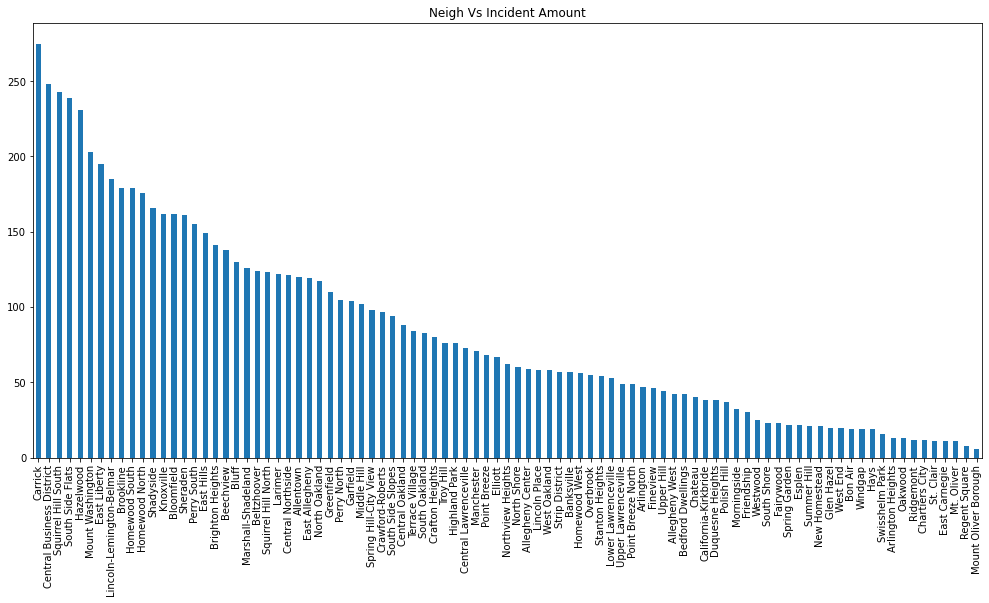

In [5]:
##Let's try this:
barLine = fireDF['neighborhood'].value_counts().plot(kind='bar', figsize = (17,8),
                                                                  rot=90,x='neighborhood',
                                                                  y='incident_type', title='Neigh Vs Incident Amount')
barLine
##this is the graph of how many times each neighborhood shows up in the dataset

This graph far more clearly depicts how many incidents occur per neighborhood, the top five neighborhoods being far more common spots for fires than any other neighborhood, especially the highest value on the far left - Carrick. 

In [6]:
neigh_count = fireDF['neighborhood'].value_counts()
neigh_count
##this lists the top and five bottom values in the graph

Carrick                      275
Central Business District    248
Squirrel Hill South          243
South Side Flats             239
Hazelwood                    231
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  8
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

In [33]:
print(neigh_count.to_string())
##this should print every numerical value in the graph - showing exact numbers instead of a general bar.

Carrick                      274
Central Business District    247
Squirrel Hill South          242
South Side Flats             238
Hazelwood                    230
Mount Washington             201
East Liberty                 195
Lincoln-Lemington-Belmar     185
Homewood South               179
Brookline                    178
Homewood North               176
Shadyside                    165
Knoxville                    162
Bloomfield                   162
Sheraden                     161
Perry South                  155
East Hills                   149
Brighton Heights             141
Beechview                    137
Bluff                        130
Marshall-Shadeland           125
Beltzhoover                  124
Squirrel Hill North          123
Larimer                      122
Central Northside            121
Allentown                    120
North Oakland                117
East Allegheny               116
Greenfield                   109
Perry North                  104
Garfield  

This properly organizes and lists each neighborhood by how many fires were recorded in it. Using this information, combined with the total incident values for each neighborhood, it'll be easy to check each value thanks to these printed values.

In [7]:
SummedVal = fireDF.groupby('neighborhood')['incident_type'].sum()
print(SummedVal.to_string())
##groups neighborhoods by incident values, then gathers the sum for each neighborhood, printed in alphabetical order

neighborhood
Allegheny Center              7791.0
Allegheny West                5608.0
Allentown                    14974.0
Arlington                     6200.0
Arlington Heights             1554.0
Banksville                    7289.0
Bedford Dwellings             5165.0
Beechview                    17473.0
Beltzhoover                  15347.0
Bloomfield                   20769.0
Bluff                        16631.0
Bon Air                       2513.0
Brighton Heights             17764.0
Brookline                    23234.0
California-Kirkbride          4868.0
Carrick                      34993.0
Central Business District    32077.0
Central Lawrenceville         9413.0
Central Northside            14974.0
Central Oakland              11037.0
Chartiers City                1576.0
Chateau                       5505.0
Crafton Heights               9950.0
Crawford-Roberts             12183.0
Duquesne Heights              4661.0
East Allegheny               15044.0
East Carnegie            

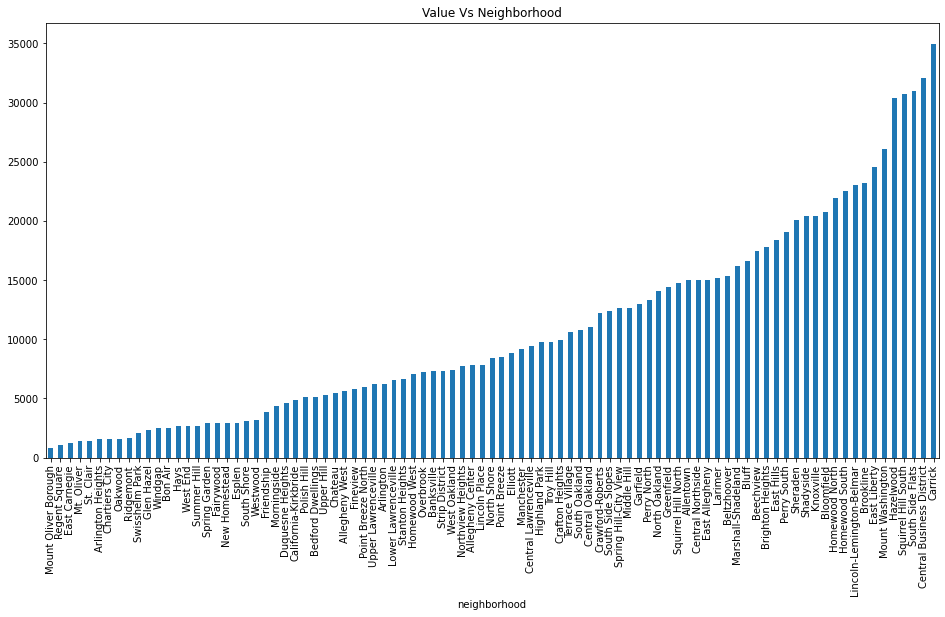

In [8]:
TotalVal = SummedVal.sort_values().plot(kind='bar', figsize = (16,8), rot=90, title="Value Vs Neighborhood")
TotalVal
##puts the data above into a chart so that it can be easier read and analyze at a glance

Originally, this was intended to calculate the highest amount of serious fires by determining which neighbrohood had the lowest incident value while also appearing the highest amount of times. However, the top 4 for incident value are far higher than the rest - absurdly so. Assuming that they're that high due to a higher amount of reports alone would be ridiculous. So, it can be logically assumed that those five neighborhoods have the most serious fires - leading to using the most water.

In [15]:
SummedVal.sort_values(ascending=False)

neighborhood
Carrick                      34843.0
Central Business District    31923.0
South Side Flats             30820.0
Squirrel Hill South          30632.0
Hazelwood                    30267.0
                              ...   
St. Clair                     1425.0
Mt. Oliver                    1410.0
East Carnegie                 1282.0
Regent Square                 1059.0
Mount Oliver Borough           806.0
Name: incident_type, Length: 91, dtype: float64

So, the top 5 values are Carrick, Central Business District, South Side Flats, Squirrel Hill South, and Hazelwood. In order to determine which neighborhood uses the most water to put out those fires, based on the number of fire hydrants in the area, I will need to use *basic algebra*. The total water used is based on the number of fire hydrants in the area. Or more accurately, the amount of water these hydrants can release in a minute - as there is no count for how much water was specifically used per hydrant.

The NFPA requires one hydrant per 800 feet. So now I need to find the total number of feet per these neighborhoods, then figure out hydrants per feet, then multiply *those* values by amount of liters a hydrant can hold. As there is no specific dataset on fire hydrants, I have needed to guesstimate and use math to try and find these values for the final total comparison.

Carrick - 1.673 mi - 8833.44 feet = roughly 11 fire hydrants in the given area
Central Business - 0.641 mi - 3384.48 feet = roughly 4 fire hydrants in the given area
South Side FLats - 0.936 mi - 4942.08 feet = roughly 6 fire hydrants in the given area
Squirrel Hill South - 2.671 mi - 14102.88 feet = roughly 18 fire hydrants in the given area
Hazelwood - 1.583 mi - 8358.24 feet = roughly 10 fire hydrants in the given area

There are different colored fire hydrants per the amount of gallons of water they use per minute. However, as I don't know the colors of these hydrants, I'll simply use the average amount between the three: 500 gallons per minute (gpm). Gpm to Lpm (liters per minute) is 1 to 3.7854, so, using that to multiply by fire hydrant count and gallon count, you arrive at:

### Carrick - an average of 20819.7 liters
### Central Business District - an average of 7570.8 liters
### South Side Flats - an average of 11356.2 liters
### Squirrel Hill South - an average of 34068.6 liters
### Hazelwood - an average of 18927 liters

Meaning that, in order of most average water released, the neighborhoods that use the most water are: Squirrel Hill South, Carrick, Hazelwood, South Side Flats, and the Central Business District.

# Conclusion

So, the top 5 most on-fire, and as such, most in need of water neighborhoods in Pittsburgh, are Carrick, Central Business District, South Side Flats, Squirrel Hill South, and Hazelwood. These five neighborhoods have been reported the most times, while also having far, far higher values for their fire total incident value counts compared to the rest of the neighborhoods. However, in terms of total water used, each neighborhood has a different ranking and value, with Squirrel Hill South theoretically using the most, due to the increased amount of area in the neighborhood. I didn't expect these five to be the highest, as originally, the purpose of doing both charts was to check which has the highest incident value while also being relatively lower on the chart for total incidents reported. However, these top 5 had values so much higher than the rest of the neighborhoods, while still not being especially higher than eachother or other neighborhoods on the total reported chart, that they would obviously be the 'most-on-fire' neighborhoods. Their incident value counts couldn't be so high otherwise. 